Getting analysis segment data for H1
Getting analysis segment data for L1


/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)
/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


Getting psd segment data for H1
Getting psd segment data for L1


15:14 bilby INFO    : Generating frequency domain strain from given time domain strain.
15:14 bilby INFO    : Applying a tukey window with alpha=0.1, roll off=0.2


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

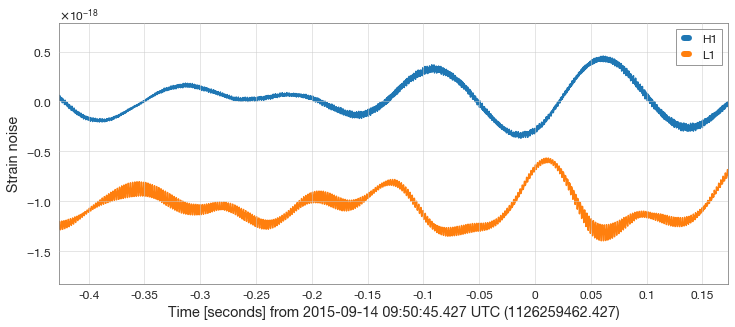

/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/gwpy/plot/log.py:78: RuntimeWarning: invalid value encountered in log10
  loglim = numpy.log10(viewlim)


ValueError: cannot convert float NaN to integer

<Plot size 864x345.6 with 1 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import bilby

from bilby import run_sampler

from bilby.core.prior import Constraint, Uniform

from bilby.gw.conversion import (
    convert_to_lal_binary_black_hole_parameters,
    generate_all_bbh_parameters
)
from bilby.gw.detector.networks import InterferometerList
from bilby.gw.detector.psd import PowerSpectralDensity
from bilby.gw.likelihood import GravitationalWaveTransient
from bilby.gw.prior import BBHPriorDict
from bilby.gw.result import CBCResult
from bilby.gw.source import lal_binary_black_hole
from bilby.gw.utils import get_event_time
from bilby.gw.waveform_generator import WaveformGenerator
from gwpy.plot import Plot as GWpyPlot
from gwpy.timeseries import TimeSeries
import os


OUTDIR = "outdir"
os.makedirs(OUTDIR, exist_ok=True)

interferometers = InterferometerList(["H1", "L1"])
trigger_time = get_event_time("GW150914")

start_time = trigger_time - 3
duration = 4
end_time = start_time + duration
roll_off = 0.2


# Get raw data
raw_data = {}
for interferometer in interferometers:
    print(
        "Getting analysis segment data for {}".format(interferometer.name)
    )
    analysis_data = TimeSeries.fetch_open_data(
        interferometer.name, start_time, end_time
    )
    interferometer.strain_data.roll_off = roll_off
    interferometer.strain_data.set_from_gwpy_timeseries(analysis_data)
    raw_data[interferometer.name] = analysis_data

# plot raw data:
plot = GWpyPlot(figsize=(12, 4.8))
ax = plot.add_subplot(xscale='auto-gps')
for ifo_name, data in raw_data.items():
    ax.plot(data, label=ifo_name)
ax.set_epoch(1126259462.427)
ax.set_xlim(1126259462, 1126259462.6)
ax.set_ylabel('Strain noise')
ax.legend()
plot.show()

# recall Dan Browns talk -- keep only data in 50-250 Hz and remove 60 Hz and 120 Hz (the 'violin modes')
# plot of Noise
# plot raw data after some basic filtering
plot = GWpyPlot(figsize=(12, 4.8))
ax = plot.add_subplot(xscale='auto-gps')
for ifo_name, data in raw_data.items():
    filtered_data = data.bandpass(50, 250).notch(60).notch(120)
    ax.plot(filtered_data, label=ifo_name)
ax.set_epoch(1126259462.427)
ax.set_xlim(1126259462, 1126259462.6)
ax.set_ylim(-1e-21, 1e-21)
ax.set_ylabel('Strain noise')
ax.legend()
plot.show()


# Get data for noise estimation -- the power spectral density (PSD)
psd_start_time = start_time + duration
psd_duration = 128
psd_end_time = psd_start_time + psd_duration
psd_tukey_alpha = 2 * roll_off / duration
overlap = duration / 2

for interferometer in interferometers:
    print("Getting psd segment data for {}".format(interferometer.name))
    psd_data = TimeSeries.fetch_open_data(
        interferometer.name, psd_start_time, psd_end_time
    )
    psd = psd_data.psd(
        fftlength=duration, overlap=overlap, window=("tukey", psd_tukey_alpha),
        method="median"
    )
    interferometer.power_spectral_density = PowerSpectralDensity(
        frequency_array=psd.frequencies.value, psd_array=psd.value
    )





/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_82075/3731844470.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(*ymin_max)


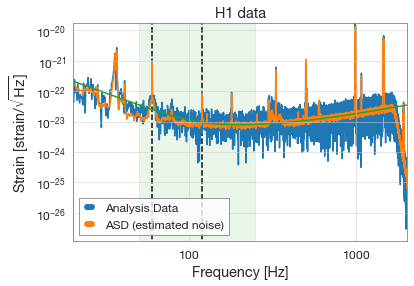

/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_82075/3731844470.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(*ymin_max)


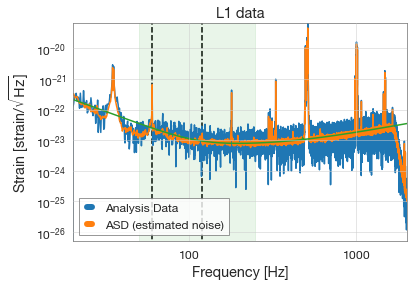

In [7]:


for interferometer in interferometers:
    analysis_data = abs(interferometer.frequency_domain_strain)
    plt.loglog(interferometer.frequency_array, analysis_data, label="Analysis Data")
    plt.loglog(interferometer.frequency_array, abs(interferometer.amplitude_spectral_density_array), label="ASD (estimated noise)")
    plt.xlim(interferometer.minimum_frequency, interferometer.maximum_frequency)
    ymin_max = [min(analysis_data), max(analysis_data)]
    plt.vlines([60, 120], *ymin_max, ls="--", color='k', zorder=-10)
    plt.fill_betweenx(ymin_max, 50, 250, color='tab:green', alpha=0.1)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel(r'Strain [strain/$\sqrt{\rm Hz}$]')
    plt.title(f"{interferometer.name} data")
    plt.ylim(*ymin_max)
    plt.legend()
    plt.show()



In [55]:
tc


1126259462.4

/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_82075/2242155045.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_82075/2242155045.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


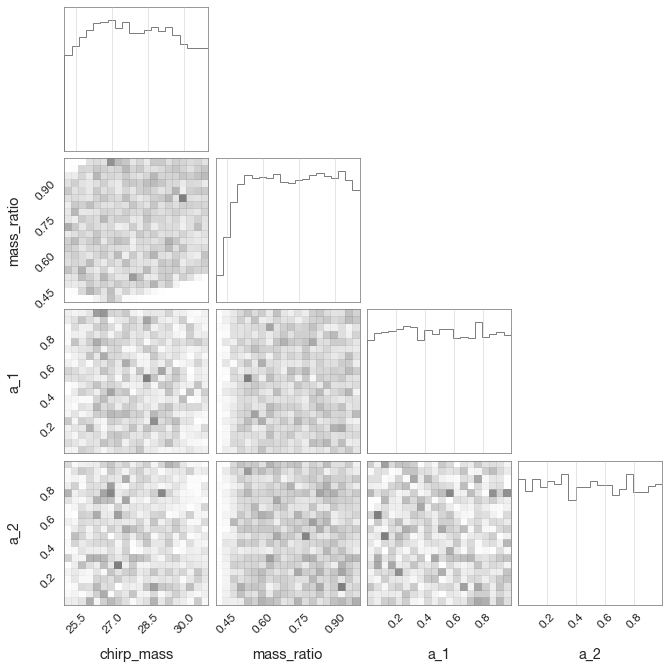

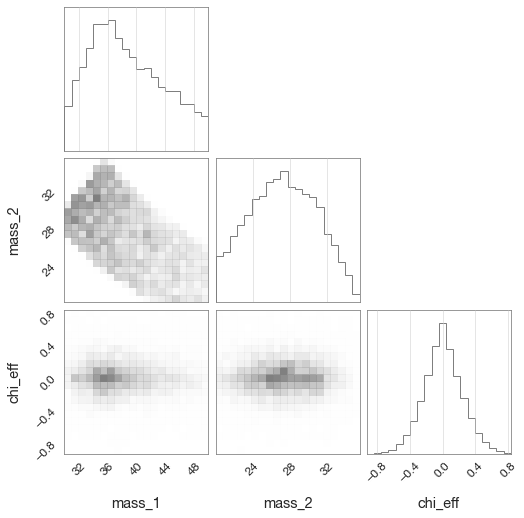

In [76]:

# setup the prior
from bilby.core.prior import Uniform, PowerLaw, Sine, Constraint, Cosine
from corner import corner
import pandas as pd

# typically we would use a priors with wide bounds:
tc = trigger_time
priors = BBHPriorDict(dict(
    mass_ratio=Uniform(name='mass_ratio', minimum=0.125, maximum=1),
    chirp_mass=Uniform(name='chirp_mass', minimum=25, maximum=31),
    mass_1=Constraint(name='mass_1', minimum=10, maximum=80),
    mass_2=Constraint(name='mass_2', minimum=10, maximum=80),
    a_1=Uniform(name='a_1', minimum=0, maximum=0.99),
    a_2=Uniform(name='a_2', minimum=0, maximum=0.99),
    tilt_1=Sine(name='tilt_1'),
    tilt_2=Sine(name='tilt_2'),
    phi_12=Uniform(name='phi_12', minimum=0, maximum=2 * np.pi, boundary='periodic'),
    phi_jl=Uniform(name='phi_jl', minimum=0, maximum=2 * np.pi, boundary='periodic'),
    luminosity_distance=PowerLaw(alpha=2, name='luminosity_distance', minimum=50, maximum=2000),
    dec=Cosine(name='dec'),
    ra=Uniform(name='ra', minimum=0, maximum=2 * np.pi, boundary='periodic'),
    theta_jn=Sine(name='theta_jn'),
    psi=Uniform(name='psi', minimum=0, maximum=np.pi, boundary='periodic'),
    phase=Uniform(name='phase', minimum=0, maximum=2 * np.pi, boundary='periodic'),
    geocent_time=Uniform(minimum=tc - 0.1, maximum=tc + 0.1, latex_label="$t_c$", unit="$s$")
))

# however, for this example (to make analysis faster) we will use a prior with tighter bounds
priors['luminosity_distance'] = 419.18
priors['mass_1'] = Constraint(name='mass_1', minimum=30, maximum=50)
priors['mass_2'] = Constraint(name='mass_2', minimum=20, maximum=40)
priors['ra'] = 2.269
priors['dec'] = -1.223
priors['geocent_time'] = tc
priors['theta_jn'] = 2.921
priors['phi_jl'] = 0.968
priors['psi'] = 2.659

prior_samples = priors.sample(10000)
prior_samples_df = pd.DataFrame(prior_samples)
prior_samples_df


parameters = ['chirp_mass', 'mass_ratio', 'a_1', 'a_2']

fig = corner(prior_samples_df[parameters], plot_datapoints=False, plot_contours=False, plot_density=True, color="tab:gray")
fig.show()

from bilby.gw.conversion import generate_mass_parameters

prior_samples = generate_mass_parameters(prior_samples)
prior_samples['cos_tilt_1'] = np.cos(prior_samples['tilt_1'])
prior_samples['cos_tilt_2'] = np.cos(prior_samples['tilt_2'])
s1z = prior_samples["a_1"] * prior_samples['cos_tilt_1']
s2z = prior_samples["a_2"] * prior_samples['cos_tilt_2']
q = prior_samples['mass_ratio']
prior_samples['chi_eff'] = (s1z + s2z * q) / (1 + q)
prior_samples_df = pd.DataFrame(prior_samples)
prior_samples_df


parameters = ['mass_1', 'mass_2', 'chi_eff']
fig = corner(prior_samples_df[parameters], plot_datapoints=False, plot_contours=False, plot_density=True, color="tab:gray")
fig.show()





In [77]:


waveform_generator = WaveformGenerator(
    duration=interferometers.duration,
    sampling_frequency=interferometers.sampling_frequency,
    frequency_domain_source_model=lal_binary_black_hole,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(
        waveform_approximant="IMRPhenomPv2",
        reference_frequency=20)
)

likelihood = GravitationalWaveTransient(
    interferometers=interferometers, waveform_generator=waveform_generator,
    priors=priors, time_marginalization=False, distance_marginalization=False,
    phase_marginalization=True, jitter_time=False
)


result = run_sampler(
    likelihood=likelihood, priors=priors, save=True,
    label="GW150914",
    nlive=50, walks=25,
    conversion_function=generate_all_bbh_parameters,
    result_class=CBCResult,
)

18:21 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
18:21 bilby INFO    : Running for label 'GW150914', output will be saved to 'outdir'
18:21 bilby INFO    : Using lal version 7.2.0
18:21 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.6;Id: 48b95bf833fd8cefeee16c7b54d63820e2589a94;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
18:21 bilby INFO    : Using lalsimulation version 4.0.0
18:21 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.6;Id: 48b95bf833fd8cefeee16c7b54d63820e2589a94;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
18:21 bilby INFO    : Analysis priors:
18:21 bilby INFO    : mass_ratio=Uniform(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None

1it [00:00, ?it/s]

/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/bilby/core/sampler/dynesty.py:885: UserWarning: Hit maximum number of walks 300 with accept=131, reject=170, and nfail=341 try increasing maxmcmc
  warnings.warn(
/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/bilby/core/sampler/dynesty.py:885: UserWarning: Hit maximum number of walks 300 with accept=93, reject=208, and nfail=435 try increasing maxmcmc
  warnings.warn(
/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/bilby/core/sampler/dynesty.py:885: UserWarning: Hit maximum number of walks 300 with accept=66, reject=235, and nfail=657 try increasing maxmcmc
  warnings.warn(
/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/bilby/core/sampler/dynesty.py:885: UserWarning: Hit maximum number of walks 300 with accept=52, reject=249, and nfail=688 try increasing maxmcmc
  warnings.warn(

18:55 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/1562 [00:00<?, ?it/s]

18:55 bilby INFO    : Reconstructing marginalised parameters.


  0%|          | 0/1562 [00:00<?, ?it/s]

18:56 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/1562 [00:00<?, ?it/s]

18:56 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/1562 [00:00<?, ?it/s]

18:56 bilby INFO    : Summary of results:
nsamples: 1562
ln_noise_evidence: -16703.244
ln_evidence: -16706.583 +/-  0.764
ln_bayes_factor: -3.339 +/-  0.764



17:53 bilby INFO    : Generating waveform figure for H1
17:53 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


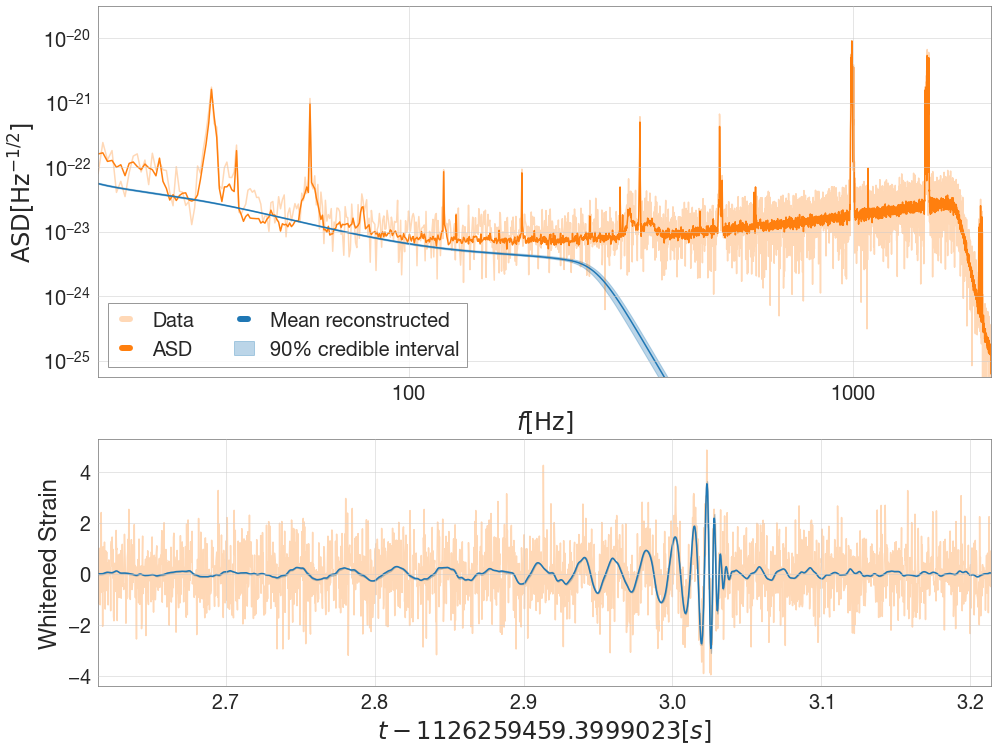

17:54 bilby INFO    : Generating waveform figure for L1
17:54 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


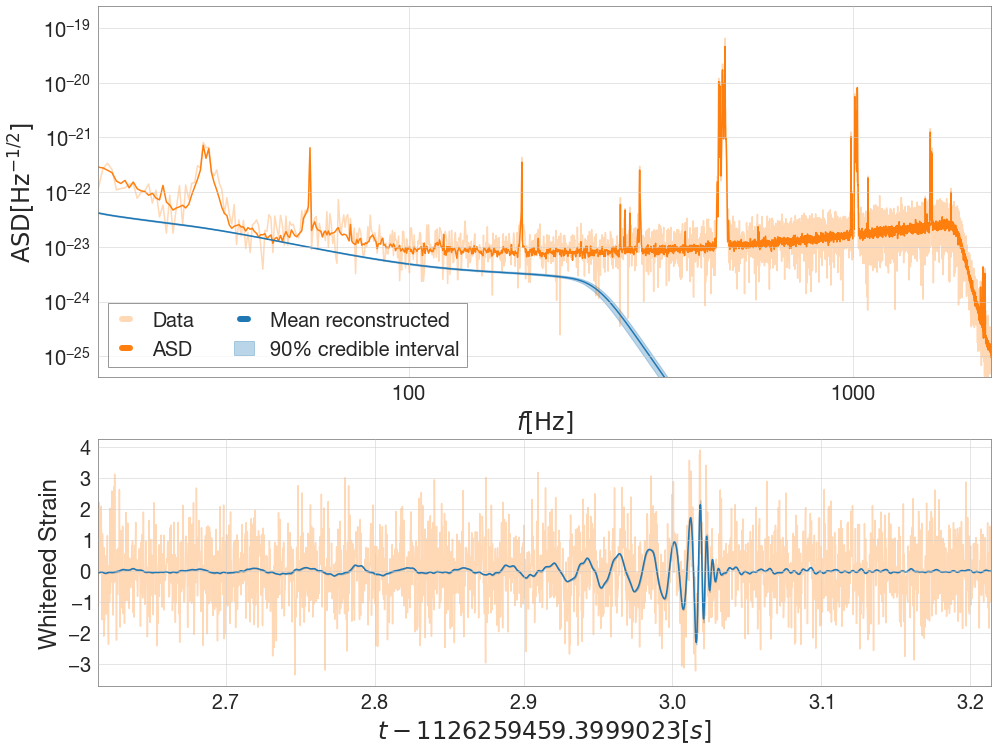

In [58]:
for interferometer in interferometers:
    fig = result.plot_interferometer_waveform_posterior(
        interferometer=interferometer, save=False
    )
    plt.show()
